In [1]:
import copy
import numpy as np
import matplotlib.pyplot as plt

from nnpl.solver import Solver

# from nnpl.blob import Blob
# from nnpl.net import Net

%load_ext autoreload
%autoreload 2

%matplotlib inline

In [41]:
a = np.random.rand(1000 * 2).reshape((1000, 2)) * 10
np.sum(a ** 2, axis=1).reshape((1000, 1))

array([[  6.87118276e+01],
       [  7.71653100e+01],
       [  7.07765130e+00],
       [  7.70468644e+01],
       [  8.30549901e+01],
       [  7.20797677e+00],
       [  8.81327328e+01],
       [  2.88775741e-02],
       [  8.65626166e+01],
       [  1.59188025e+01],
       [  6.45432140e+01],
       [  7.49283884e+01],
       [  7.41486131e+01],
       [  6.86766844e+01],
       [  7.12660176e+01],
       [  9.20416885e+01],
       [  2.92575105e+01],
       [  1.11959355e+02],
       [  5.43152745e+01],
       [  1.32508576e+01],
       [  2.39627237e+01],
       [  8.67362530e+00],
       [  4.78037610e+01],
       [  1.67745809e+02],
       [  6.19685083e+01],
       [  1.38421098e+02],
       [  6.47764623e+01],
       [  7.38772401e+01],
       [  1.23870099e+01],
       [  3.29394070e+01],
       [  7.04976137e+01],
       [  3.45787039e+01],
       [  1.29835609e+02],
       [  4.54526162e+01],
       [  5.51783940e+01],
       [  7.23384116e+00],
       [  1.38513678e+02],
 

855.000448643
845.118501718
835.407939001
825.764346728
816.092171515
806.303666922
796.318409032
786.063398057
775.473743327
764.49389505
753.079334498
741.198565712
728.835174746
715.989653145
702.680643585
688.945281094
674.83838801
660.430431779
645.804345699
631.051499677
616.267242805
601.546488232
586.979766419
572.650055995
558.630550211
544.983370747
531.759128153
518.997161468
506.72626649
494.965731723
483.726529854
473.012548933
462.821783021
453.147432519
443.978887854
435.302587006
427.10274835
419.361986891
412.061825383
405.183113147
398.706365354
392.612034753
386.880726666
381.493366735
376.431329618
371.676535595
367.211520964
363.019487127
359.084332449
355.39067029
351.92383597
348.669885006
345.615584471
342.748399061
340.0564731
337.528609545
335.154246826
332.923434183
330.82680609
328.85555617
327.001410985
325.256603972
323.613849738
322.066318903
320.607613612
319.231743806
317.933104345
316.706453004
315.546889396
314.449834814
313.411013017
312.42643194
311

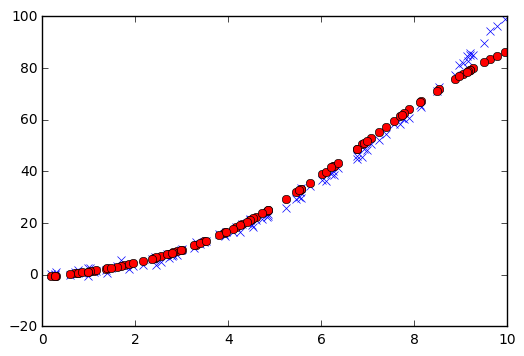

In [2]:
def randn_test():
    mem_data_param = {}
    mem_data_param['batch_size'] = 100
#     mem_data_param['features'] = np.random.randn(100, 20)
#     mem_data_param['labels'] = np.random.rand(100)
#     mem_data_param['features'] = np.random.rand(1000 * 2).reshape((1000, 2)) * 10
#     mem_data_param['labels'] = np.sum(mem_data_param['features'] ** 2, axis=1).reshape((1000, 1)) + np.random.randn(1000).reshape((1000, 1))
    mem_data_param['features'] = np.random.rand(100).reshape((100, 1)) * 10
    mem_data_param['labels'] = np.sum(mem_data_param['features'] ** 2, axis=1).reshape((100, 1)) + np.random.randn(100).reshape((100, 1))
    mem_data_param['type'] = 'MemData'
    mem_data_param['name'] = 'memdata'
    mem_data_param['tops'] = ['features', 'labels']
    mem_data_param['bottoms'] = []
    
    weight_filler_param1 = {'type': 'gaussian', 'std': 0.01}
    bias_filler_param1 = {'type': 'constant'}
    ip_param1 = {}
    ip_param1['type'] = 'InnerProduct'
    ip_param1['tops'] = ['ip1']
    ip_param1['bottoms'] = ['features']
    ip_param1['output_size'] = 40
    ip_param1['name'] = 'ip1'
    ip_param1['weight_filler_param'] = weight_filler_param1
    ip_param1['bias_filler_param'] = bias_filler_param1
    
    sig_param1 = {}
    sig_param1['type'] = 'Sigmoid'
    sig_param1['name'] = 'sig1'
    sig_param1['bottoms'] = ['ip1']
    sig_param1['tops'] = ['sig1']
    
    weight_filler_param2 = {'type': 'gaussian', 'std': 0.01}
    bias_filler_param2 = {'type': 'constant'}
    ip_param2 = {}
    ip_param2['type'] = 'InnerProduct'
    ip_param2['tops'] = ['ip2']
    ip_param2['bottoms'] = ['sig1']
    ip_param2['output_size'] = 1
    ip_param2['name'] = 'ip2'
    ip_param2['weight_filler_param'] = weight_filler_param2
    ip_param2['bias_filler_param'] = bias_filler_param2
    
    el_param = {}
    el_param['type'] = 'EuclideanLoss'
    el_param['name'] = 'euclidean loss'
    el_param['bottoms'] = ['ip2', 'labels']
    el_param['tops'] = []
    
    net_param = [mem_data_param, ip_param1, sig_param1, ip_param2, el_param]
    solver_param = {'net': net_param, 'lr_rate': 1e-5, 'max_iter': 3000, 'type': 'sgd'}
    s = Solver(solver_param)
    s.solve()
    features = s.net_.layers_[0].features_
    labels = s.net_.layers_[0].labels_
    pred = s.net_.blobs_[-1].data_
    plt.plot(features, labels, 'bx', features, pred, 'ro')
    plt.show()
#     sig_param2 = {}
#     sig_param2['type'] = 'Sigmoid'
#     sig_param2['name'] = 'sig2'
#     sig_param2['bottoms'] = ['ip2']
#     sig_param2['tops'] = ['sig2']
    
#     weight_filler_param3 = {'type': 'gaussian', 'std': 0.01}
#     bias_filler_param3 = {'type': 'constant'}
#     ip_param3 = {}
#     ip_param3['type'] = 'InnerProduct'
#     ip_param3['tops'] = ['ip3']
#     ip_param3['bottoms'] = ['sig2']
#     ip_param3['output_size'] = 20
#     ip_param3['name'] = 'ip3'
#     ip_param3['weight_filler_param'] = weight_filler_param3
#     ip_param3['bias_filler_param'] = bias_filler_param3
    
#     net_param = [mem_data_param, ip_param1, sig_param1, ip_param2, sig_param2, ip_param3]
    return 

randn_test()


In [18]:
net_param = randn_test()
n = Net(net_param)
n.forward_backward()
print n.blob_names_
print n.blobs_[n.blob_name2idx_['ip1']].data_.shape
# print n.blobs_[n.blob_name2idx_['ip1']].data_[:, 0]

[<nnpl.layers.mem_data_layer.MemDataLayer instance at 0x09783210>, <nnpl.layers.inner_product_layer.InnerProductLayer instance at 0x097743C8>, <nnpl.layers.sigmoid_layer.SigmoidLayer instance at 0x09774FD0>, <nnpl.layers.inner_product_layer.InnerProductLayer instance at 0x09774F80>, <nnpl.layers.sigmoid_layer.SigmoidLayer instance at 0x096D5918>, <nnpl.layers.inner_product_layer.InnerProductLayer instance at 0x09331120>]
['features', 'labels', 'ip1', 'sig1', 'ip2', 'sig2', 'ip3']
(100, 20)


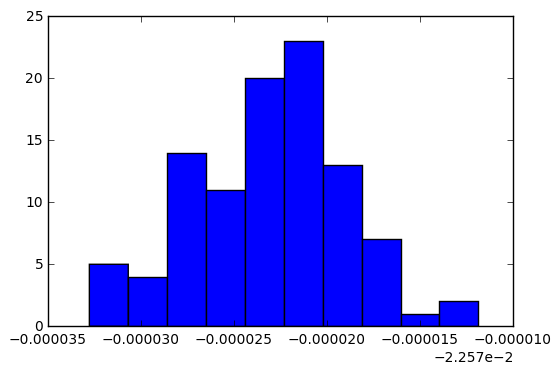

In [17]:
plt.hist(n.blobs_[n.blob_name2idx_['ip3']].data_[:, 0])
plt.show()

In [10]:
plt.hist(n.layers_[1].blobs_[0].data_.reshape(-1))

NameError: name 'n' is not defined

In [4]:
def iris_test():
    txt_data_param = {}
    txt_data_param['type'] = 'TxtData'
    txt_data_param['tops'] = ['features', 'labels']
    txt_data_param['bottoms'] = []
    txt_data_param['batch_size'] = 150
    txt_data_param['feature_file'] = './iris/features.dat'
    txt_data_param['label_file'] = './iris/labels.dat'
    txt_data_param['num_entries'] = 150
    txt_data_param['name'] = 'Data'
    
    weight_filler_param1 = {'type': 'gaussian', 'std': 0.01}
    bias_filler_param1 = {'type': 'constant'}
    ip_param1 = {}
    ip_param1['type'] = 'InnerProduct'
    ip_param1['tops'] = ['ip1']
    ip_param1['bottoms'] = ['features']
    ip_param1['output_size'] = 100
    ip_param1['name'] = 'ip1'
    ip_param1['weight_filler_param'] = weight_filler_param1
    ip_param1['bias_filler_param'] = bias_filler_param1
    
    sig_param = {}
    sig_param['type'] = 'Sigmoid'
    sig_param['name'] = 'sig'
    sig_param['bottoms'] = ['ip1']
    sig_param['tops'] = ['sig']
    
    weight_filler_param2 = {'type': 'gaussian', 'std': 0.01}
    bias_filler_param2 = {'type': 'constant'}
    ip_param2 = {}
    ip_param2['type'] = 'InnerProduct'
    ip_param2['tops'] = ['ip2']
    ip_param2['bottoms'] = ['sig']
    ip_param2['output_size'] = 3
    ip_param2['name'] = 'ip2'
    ip_param2['weight_filler_param'] = weight_filler_param2
    ip_param2['bias_filler_param'] = bias_filler_param2
    
    sm_param = {}
    sm_param['type'] = 'SoftmaxLoss'
    sm_param['name'] = 'softmax'
    sm_param['bottoms'] = ['ip2', 'labels']
    sm_param['tops'] = []
    
    net_param = [txt_data_param, ip_param1, sig_param, ip_param2, sm_param]
    
    solver_param = {'net': net_param, 'lr_rate': 0.5, 'max_iter': 500, 'type': 'sgd'}
    
    s = Solver(solver_param)
    
    s.solve()
    
#     print 'Blobs: ', s.net_.blob_names_
    gt = s.net_.blobs_[s.net_.blob_name2idx_['labels']].data_.reshape(-1)
    pred = np.argmax(s.net_.blobs_[s.net_.blob_name2idx_['ip2']].data_, axis=1)
#     print pred
#     print gt
    print 'accuracy: ', np.sum(pred == gt) / float(gt.shape[0])
    return

iris_test()

1.09966097383
1.10862347156
1.20896873738
1.85329120916
2.3057866646
1.14371732993
1.17796669135
1.25494891224
1.24594578212
1.22867065668
1.19864960409
1.13707709427
1.1252605706
1.08785082679
1.07504483298
1.05111599284
1.03608738703
1.01522244424
0.99674580376
0.973885137797
0.951411169914
0.925536405019
0.900447983531
0.873169778702
0.848217619294
0.821900216289
0.800303510168
0.776719941044
0.761331507246
0.739568560271
0.729886013695
0.70482801629
0.694363227282
0.662840367057
0.645137786368
0.612676524832
0.590394250457
0.565097246049
0.546142510425
0.52986899961
0.516461952851
0.505316727013
0.495163018696
0.486211166003
0.477869916072
0.470376983213
0.463532126326
0.457550213853
0.452371170471
0.44830086939
0.445326335692
0.443906641639
0.443900047048
0.445828188788
0.448868401637
0.453386155938
0.457061622334
0.46072953237
0.460654772603
0.460122805459
0.454677614309
0.450297487397
0.441821547353
0.435912911042
0.427154521943
0.421408024445
0.413764139778
0.408896041062
0.402